In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
csv_url = r"C:\Users\GIA BAO\OneDrive - Trường ĐH CNTT - University of Information Technology\Vinamilk (1).csv"

In [47]:
data = pd.read_csv(csv_url, delimiter=';')

In [48]:
print(data)

            Date       Price        Open        High        Low      Vol  \
0     12/15/2023   68,100.00   68,500.00   68,600.00  68,100.00    3.74M   
1     12/14/2023   68,400.00   68,400.00   68,900.00  68,200.00    1.46M   
2     12/13/2023   68,200.00   69,600.00   69,700.00  68,100.00    4.51M   
3     12/12/2023   69,400.00   70,000.00   70,100.00  69,000.00    2.79M   
4     12/11/2023   70,000.00   70,500.00   70,500.00  69,900.00    4.73M   
...          ...         ...         ...         ...        ...      ...   
1724  01/20/2017  100,319.00   99,529.00  101,346.00  99,529.00    1.91M   
1725  01/19/2017   99,529.00   99,766.00   99,766.00  99,450.00    1.04M   
1726  01/18/2017   99,529.00   99,529.00   99,687.00  98,897.00    1.02M   
1727  01/17/2017   99,608.00  100,082.00  100,082.00  99,608.00  698.86K   
1728  01/16/2017   99,924.00  100,319.00  100,398.00  99,845.00  723.16K   

      Change  
0     -0.44%  
1      0.29%  
2     -1.73%  
3     -0.86%  
4      1.45%

In [49]:
# Convert the 'Date' column to datetime with the correct format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.sort_values(by='Date', inplace=True)
print(data)

           Date       Price        Open        High        Low      Vol  \
1728 2017-01-16   99,924.00  100,319.00  100,398.00  99,845.00  723.16K   
1727 2017-01-17   99,608.00  100,082.00  100,082.00  99,608.00  698.86K   
1726 2017-01-18   99,529.00   99,529.00   99,687.00  98,897.00    1.02M   
1725 2017-01-19   99,529.00   99,766.00   99,766.00  99,450.00    1.04M   
1724 2017-01-20  100,319.00   99,529.00  101,346.00  99,529.00    1.91M   
...         ...         ...         ...         ...        ...      ...   
4    2023-12-11   70,000.00   70,500.00   70,500.00  69,900.00    4.73M   
3    2023-12-12   69,400.00   70,000.00   70,100.00  69,000.00    2.79M   
2    2023-12-13   68,200.00   69,600.00   69,700.00  68,100.00    4.51M   
1    2023-12-14   68,400.00   68,400.00   68,900.00  68,200.00    1.46M   
0    2023-12-15   68,100.00   68,500.00   68,600.00  68,100.00    3.74M   

      Change  
1728  -0.32%  
1727  -0.32%  
1726  -0.08%  
1725   0.00%  
1724   0.79%  
...      

In [50]:
# Remove ',' and convert format
cols_to_convert = ['Price', 'Open', 'High', 'Low']
data[cols_to_convert] = data[cols_to_convert].replace(',', '', regex=True).astype(float)
# Convert the format of the "Vol" column
def convert_vol(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

data['Vol'] = data['Vol'].apply(convert_vol)

# Convert the format of the "Change" column
data['Change'] = data['Change'].replace('%', '', regex=True).astype(float) / 100.0

print(data)

           Date     Price      Open      High      Low        Vol  Change
1728 2017-01-16   99924.0  100319.0  100398.0  99845.0   723160.0 -0.0032
1727 2017-01-17   99608.0  100082.0  100082.0  99608.0   698860.0 -0.0032
1726 2017-01-18   99529.0   99529.0   99687.0  98897.0  1020000.0 -0.0008
1725 2017-01-19   99529.0   99766.0   99766.0  99450.0  1040000.0  0.0000
1724 2017-01-20  100319.0   99529.0  101346.0  99529.0  1910000.0  0.0079
...         ...       ...       ...       ...      ...        ...     ...
4    2023-12-11   70000.0   70500.0   70500.0  69900.0  4730000.0  0.0145
3    2023-12-12   69400.0   70000.0   70100.0  69000.0  2790000.0 -0.0086
2    2023-12-13   68200.0   69600.0   69700.0  68100.0  4510000.0 -0.0173
1    2023-12-14   68400.0   68400.0   68900.0  68200.0  1460000.0  0.0029
0    2023-12-15   68100.0   68500.0   68600.0  68100.0  3740000.0 -0.0044

[1729 rows x 7 columns]


In [51]:
descriptive_stats = data.describe()
print(descriptive_stats)

                                Date          Price          Open  \
count                           1729    1729.000000    1729.00000   
mean   2020-07-04 18:16:51.914401280   97543.479584   97543.98288   
min              2017-01-16 00:00:00   61260.100000   61829.90000   
25%              2018-10-11 00:00:00   78000.000000   78000.00000   
50%              2020-07-07 00:00:00   94612.300000   94746.00000   
75%              2022-03-29 00:00:00  106269.000000  106269.00000   
max              2023-12-15 00:00:00  175578.000000  175333.00000   
std                              NaN   25289.388548   25238.39568   

                High            Low           Vol       Change  
count    1729.000000    1729.000000  1.729000e+03  1729.000000  
mean    98436.947195   96692.254482  1.815560e+06    -0.000086  
min     63159.600000   61260.100000  1.752100e+05    -0.245900  
25%     78889.500000   77100.000000  8.708400e+05    -0.007800  
50%     95551.000000   93933.000000  1.420000e+06    

In [52]:
data = data.sort_values(by='Date')

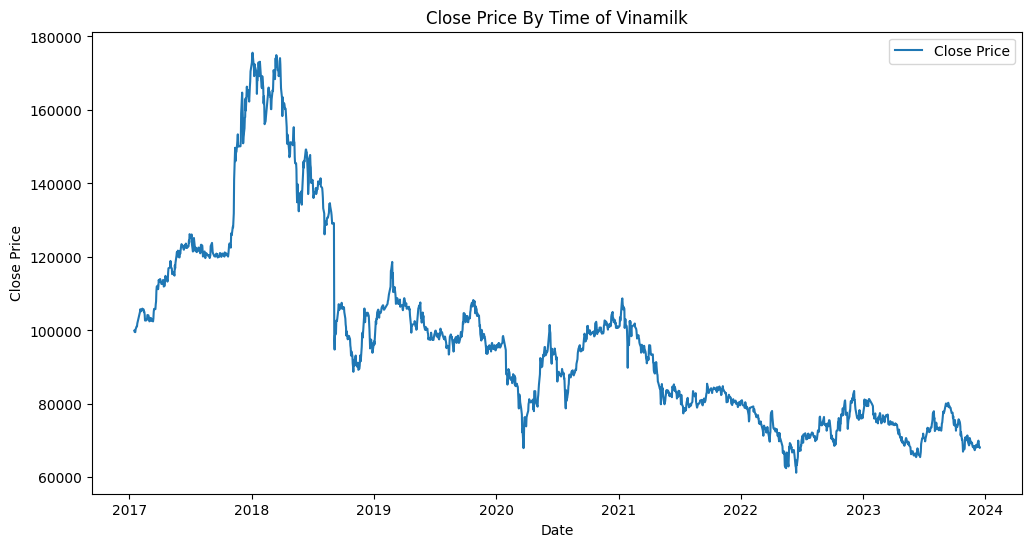

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Close Price')
plt.title('Close Price By Time of Vinamilk')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()